In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import datasets


In [2]:
# Datensatz aus Bibliothek laden (Standarddatensatz)

iris = datasets.load_iris()
type(iris)

X = iris.data # Input Variablen
y = iris.target # Output Variable
df_iris = pd.DataFrame(X, columns = iris.feature_names) # Dataframe konstruieren
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64


<Axes: >

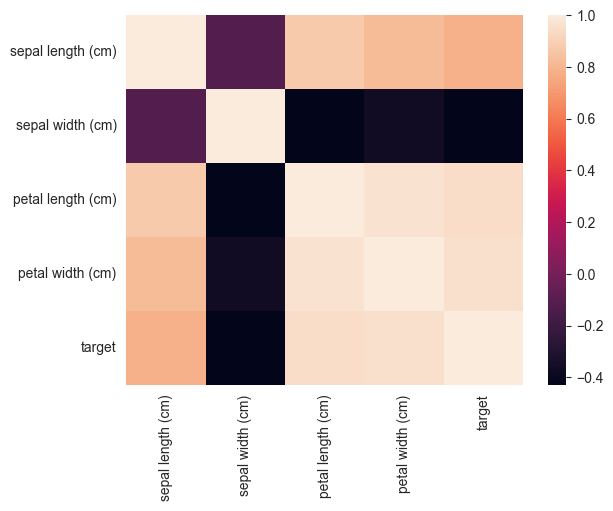

In [3]:
print(df_iris.corr()["target"])
sns.heatmap(df_iris.corr())

In [35]:
# Modelltraining 80/20 Split 1
#X = df_iris.drop(["target", "petal length (cm)", "petal width (cm)"],axis=1) # ohne petal variablen
X = df_iris.drop('target', axis=1)
y = df_iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

# fit decision tree with depth 2
dtr = DecisionTreeClassifier().fit(X_train, y_train)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

print('Accuracy Train: ', accuracy_score(y_train, y_train_pred))
print('Accuracy Test: ', accuracy_score(y_test, y_test_pred))

Accuracy Train:  1.0
Accuracy Test:  0.9333333333333333


Im Vergleich zweier Decision Trees fällt auf, dass sich die Entscheidungsvariablen unterscheiden.

[Text(0.5, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.41666666666666663, 0.8571428571428572, 'True  '),
 Text(0.6666666666666666, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.5, 0.6428571428571429, 'x[2] <= 5.45\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6666666666666666, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0,

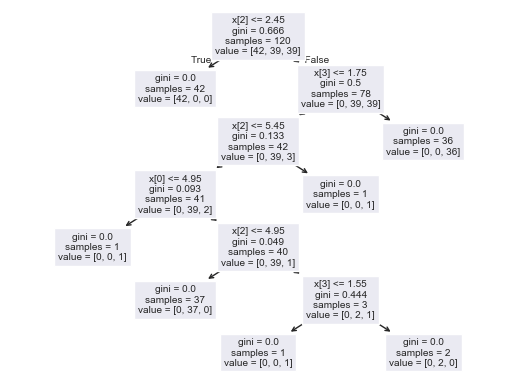

In [36]:
# Plot des trainierten Baumes
tree.plot_tree(dtr)

MSE Train:  0.058333333333333334
MSE Test:  0.3


[Text(0.3418560606060606, 0.9615384615384616, 'x[0] <= 5.45\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.09090909090909091, 0.8846153846153846, 'x[1] <= 2.8\ngini = 0.219\nsamples = 41\nvalue = [36, 4, 1]'),
 Text(0.21638257575757575, 0.9230769230769231, 'True  '),
 Text(0.06060606060606061, 0.8076923076923077, 'x[0] <= 4.7\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.030303030303030304, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.09090909090909091, 0.7307692307692307, 'x[0] <= 4.95\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.06060606060606061, 0.6538461538461539, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.030303030303030304, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.09090909090909091, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12121212121212122, 0.6538461538461539, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1212121

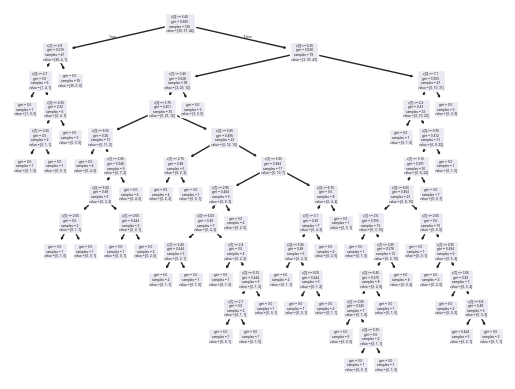

In [37]:
# Modelltraining 80/20 Split 1
X = df_iris.drop(["target", "petal length (cm)", "petal width (cm)"],axis=1)
y = df_iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

# fit decision tree with depth 2
dtr = DecisionTreeClassifier().fit(X_train, y_train)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

print('MSE Train: ', mean_squared_error(y_train, y_train_pred))
print('MSE Test: ', mean_squared_error(y_test, y_test_pred))

# Plot des trainierten Baumes
tree.plot_tree(dtr)


## Ziehen mit Zurücklegen - Bootstrap

Anzahl der Beobachtungen im Boston Dataset:  150
Mittelwert der eindeutigen Samples je Bootstrap Ziehung:  0.6308666666666667
Mittelwert der Accuracy je Boostrap Ziehung:  acc_train          0.961
acc_outOfBag    0.690086
dtype: object
Standardabweichung der Accuracy je Boostrap Ziehung:  acc_train       0.014933
acc_outOfBag    0.059915
dtype: object


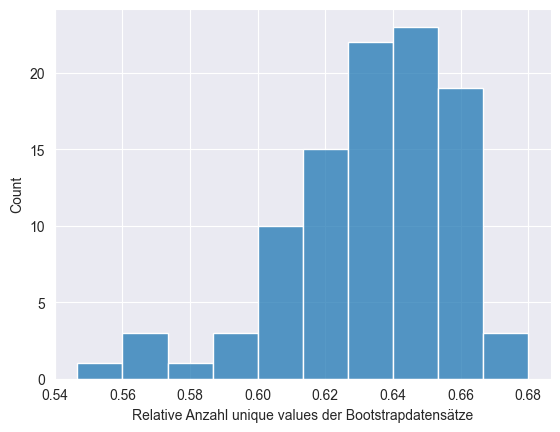

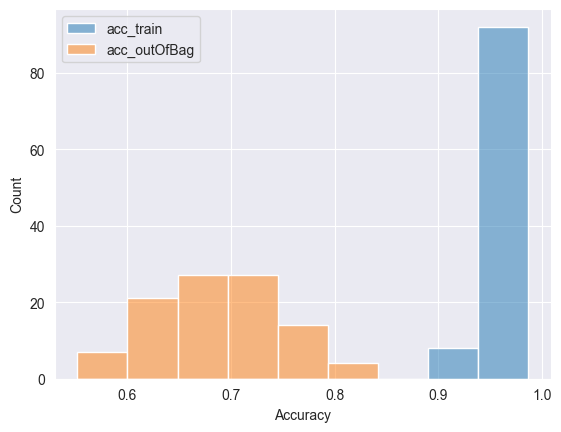

,Methode,acc_train,acc_test
0,Bootstrap,0.961,0.690086
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [38]:
print("Anzahl der Beobachtungen im Boston Dataset: ",len(df_iris))
num_runs = 100 # Anzahl der Ziehungen
rel_num_unique_vals = np.empty(num_runs)
acc = pd.DataFrame(columns=['acc_train', 'acc_outOfBag'], index=range(num_runs))

# Data Frame für Accuracy aller Modelle
acc_overall = pd.DataFrame(columns=['Methode', 'acc_train', 'acc_test'], index=range(num_runs))


i = 0
while i < num_runs:
    # Ziehen mit zurücklegen
    outcome = np.random.randint(0, len(df_iris)-1, size=len(df_iris))
    rel_num_unique_vals[i] = len(np.unique(outcome))/len(df_iris)

    # Out-of-Bag: Beobachtungen die nicht ausgewählt wurden
    # Hierüber kann der Testfehler direkt geschätzt werden
    outOfBag = np.arange(0,len(df_iris)-1,1)
    outOfBag = np.delete(outOfBag, outcome)

    # Sampling
    Boston_sample = df_iris.loc[outcome,:]
    Boston_outOfBag = df_iris.loc[outOfBag,:]
    X = Boston_sample.drop(["target", "petal length (cm)", "petal width (cm)"],axis=1)
    X_outOfBag = Boston_outOfBag.drop(["target", "petal length (cm)", "petal width (cm)"],axis=1)
    y = Boston_sample["target"]
    y_outOfBag = Boston_outOfBag["target"]

    # Training
    dtr = DecisionTreeClassifier().fit(X, y)
    # Prediction
    y_pred = dtr.predict(X)
    y_outOfBag_pred = dtr.predict(X_outOfBag)

    #mse_train[i] = mean_squared_error(y, y_pred)
    #mse_outOfBag[i] = mean_squared_error(y, y_outOfBag)
    acc.loc[i, "acc_train"] = accuracy_score(y, y_pred)
    acc.loc[i, "acc_outOfBag"] = accuracy_score(y_outOfBag, y_outOfBag_pred)

    i = i+1

print("Mittelwert der eindeutigen Samples je Bootstrap Ziehung: ", rel_num_unique_vals.mean())
print("Mittelwert der Accuracy je Boostrap Ziehung: ", acc.mean())
print("Standardabweichung der Accuracy je Boostrap Ziehung: ", acc.std())

sns.histplot(rel_num_unique_vals)
plt.xlabel('Relative Anzahl unique values der Bootstrapdatensätze')
plt.show()

sns.histplot(acc)
plt.xlabel('Accuracy')
plt.show()
acc.head()

acc_overall.loc[0, "Methode"] = 'Bootstrap'
acc_overall.loc[0, "acc_train"] = acc['acc_train'].mean()
acc_overall.loc[0, "acc_test"] = acc['acc_outOfBag'].mean()
acc_overall.head()


## Bagging Decision Tree Classifier

In [39]:
# Erstellen eines Bagging Classifiers - default Decision Tree
# B = n_estimators
X = df_iris.drop(["target", "petal length (cm)", "petal width (cm)"],axis=1)
y = df_iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
clf = BaggingClassifier(n_estimators=100, oob_score=True) # Decision Tree per Default
# Trainingsfehler
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
# Testfehler
y_pred_test = clf.predict(X_test)

print("Accuracy Train Bagging Classifer: ", accuracy_score(y_train, y_pred))
print("Accuracy Test Bagging Classifer: ", accuracy_score(y_test, y_pred_test))
print("Out-of-bag Model score: ",(clf.oob_score_))

acc_overall.loc[1, "Methode"] = 'Bagging DTC'
acc_overall.loc[1, "acc_train"] = accuracy_score(y_train, y_pred)
acc_overall.loc[1, "acc_test"] = accuracy_score(y_test, y_pred_test)
acc_overall.head()

Accuracy Train Bagging Classifer:  0.925
Accuracy Test Bagging Classifer:  0.7333333333333333
Out-of-bag Model score:  0.675


,Methode,acc_train,acc_test
0,Bootstrap,0.961,0.690086
1,Bagging DTC,0.925,0.733333
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Im Gegensatz zu einer Baseline Test Accuracy von 63%, beträgt die Bagging Accuracy bei 76,7%, Out-of-bag 66,67%

## Decision Tree mit Cost Compleity Pruning

Bestes ccp_alpha durch Cross-Validation: 0.007944775132275136
Genauigkeit des besten Modells auf dem Testdatensatz: 0.6333


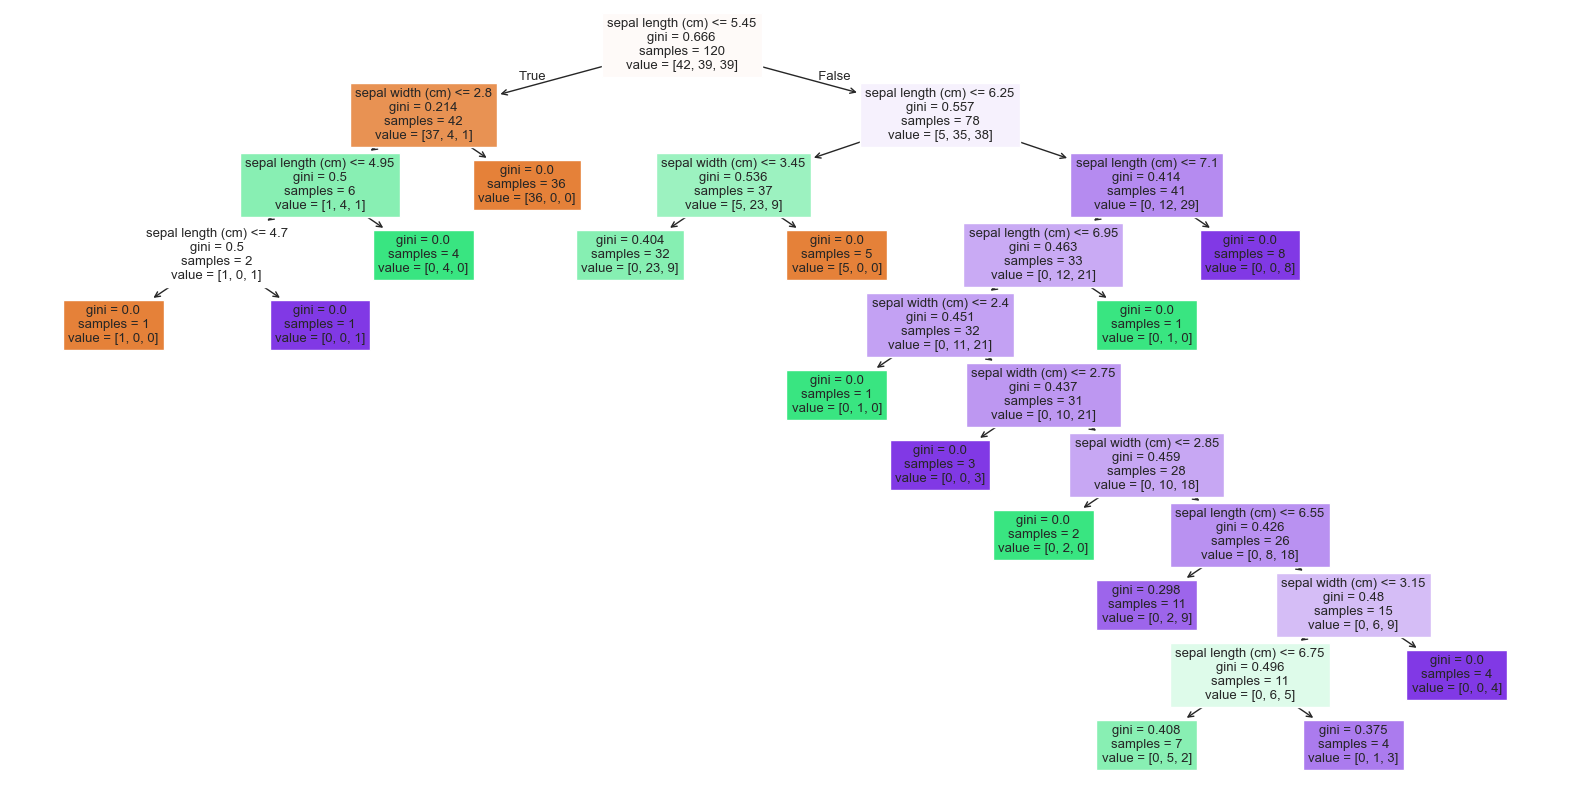

             Feature  Gini Importance
0  sepal length (cm)         0.696774
1   sepal width (cm)         0.303226


In [40]:
# Ermittlung aller ccp_alpha-Werte durch den Pruning-Pfad
dtc = DecisionTreeClassifier().fit(X_train, y_train)
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Verwendung von GridSearchCV zur Bestimmung des besten ccp_alpha-Werts
param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best ccp_alpha
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print(f"Bestes ccp_alpha durch Cross-Validation: {best_ccp_alpha}")

# Modell mit dem besten ccp_alpha trainieren
best_dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
best_dtc.fit(X_train, y_train)

# Vorhersagen und Genauigkeit auf den Testdaten
y_pred_test = best_dtc.predict(X_test)
y_pred_train = best_dtc.predict(X_train)
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")

acc_overall.loc[2, "Methode"] = 'DTC Pruning'
acc_overall.loc[2, "acc_train"] = accuracy_score(y_train, y_pred_train)
acc_overall.loc[2, "acc_test"] = accuracy_score(y_test, y_pred_test)

# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
tree.plot_tree(best_dtc, filled=True, feature_names=X.columns)
plt.show()

# Gini Feature Importance
importance = best_dtc.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importance}).sort_values(
     'Gini Importance', ascending=False)
print(feature_imp_df)

In [27]:
acc_overall.head()

,Methode,acc_train,acc_test
0,Bootstrap,0.9622,0.697585
1,Bagging DTC,0.925,0.733333
2,DTC Pruning,0.883333,0.633333
3,NaN,NaN,NaN
4,NaN,NaN,NaN


## Random Forest

In [41]:
rfc = RandomForestClassifier(random_state=42) # n_estimators =100 default
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
print("Accuracy Train Random Forest Classifer: ", accuracy_score(y_train, y_pred))
print("Accuracy Test Random Forest Classifer: ", accuracy_score(y_test, y_pred_test))

# Gini Feature Importance
importance = rfc.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importance}).sort_values(
    'Gini Importance', ascending=False)
print(feature_imp_df)


acc_overall.loc[3, "Methode"] = 'Random Forest'
acc_overall.loc[3, "acc_train"] = accuracy_score(y_train, y_pred)
acc_overall.loc[3, "acc_test"] = accuracy_score(y_test, y_pred_test)
acc_overall.head()

Accuracy Train Random Forest Classifer:  0.925
Accuracy Test Random Forest Classifer:  0.7666666666666667
             Feature  Gini Importance
0  sepal length (cm)         0.618184
1   sepal width (cm)         0.381816


,Methode,acc_train,acc_test
0,Bootstrap,0.961,0.690086
1,Bagging DTC,0.925,0.733333
2,DTC Pruning,0.883333,0.633333
3,Random Forest,0.925,0.766667
4,NaN,NaN,NaN


## Gradient Boosting Classifier

In [42]:
gbm = GradientBoostingClassifier(random_state=42, n_estimators=1000) # n_estimators =100 default, learning_rate default 0.1, for regression or classification
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)
print("Accuracy Train Random Forest Classifer: ", accuracy_score(y_train, y_pred))
print("Accuracy Test Random Forest Classifer: ", accuracy_score(y_test, y_pred_test))

# Gini Feature Importance
importance = gbm.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importance}).sort_values(
    'Gini Importance', ascending=False)
print(feature_imp_df)

acc_overall.loc[4, "Methode"] = 'Gradient Boosting Classifier'
acc_overall.loc[4, "acc_train"] = accuracy_score(y_train, y_pred)
acc_overall.loc[4, "acc_test"] = accuracy_score(y_test, y_pred_test)
acc_overall.head()

Accuracy Train Random Forest Classifer:  0.925
Accuracy Test Random Forest Classifer:  0.7
             Feature  Gini Importance
0  sepal length (cm)         0.706676
1   sepal width (cm)         0.293324


,Methode,acc_train,acc_test
0,Bootstrap,0.961,0.690086
1,Bagging DTC,0.925,0.733333
2,DTC Pruning,0.883333,0.633333
3,Random Forest,0.925,0.766667
4,Gradient Boosting Classifier,0.925,0.7
